In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..", "..")))
from utils import *

## Model Size

### Graph Compilation Not Cached

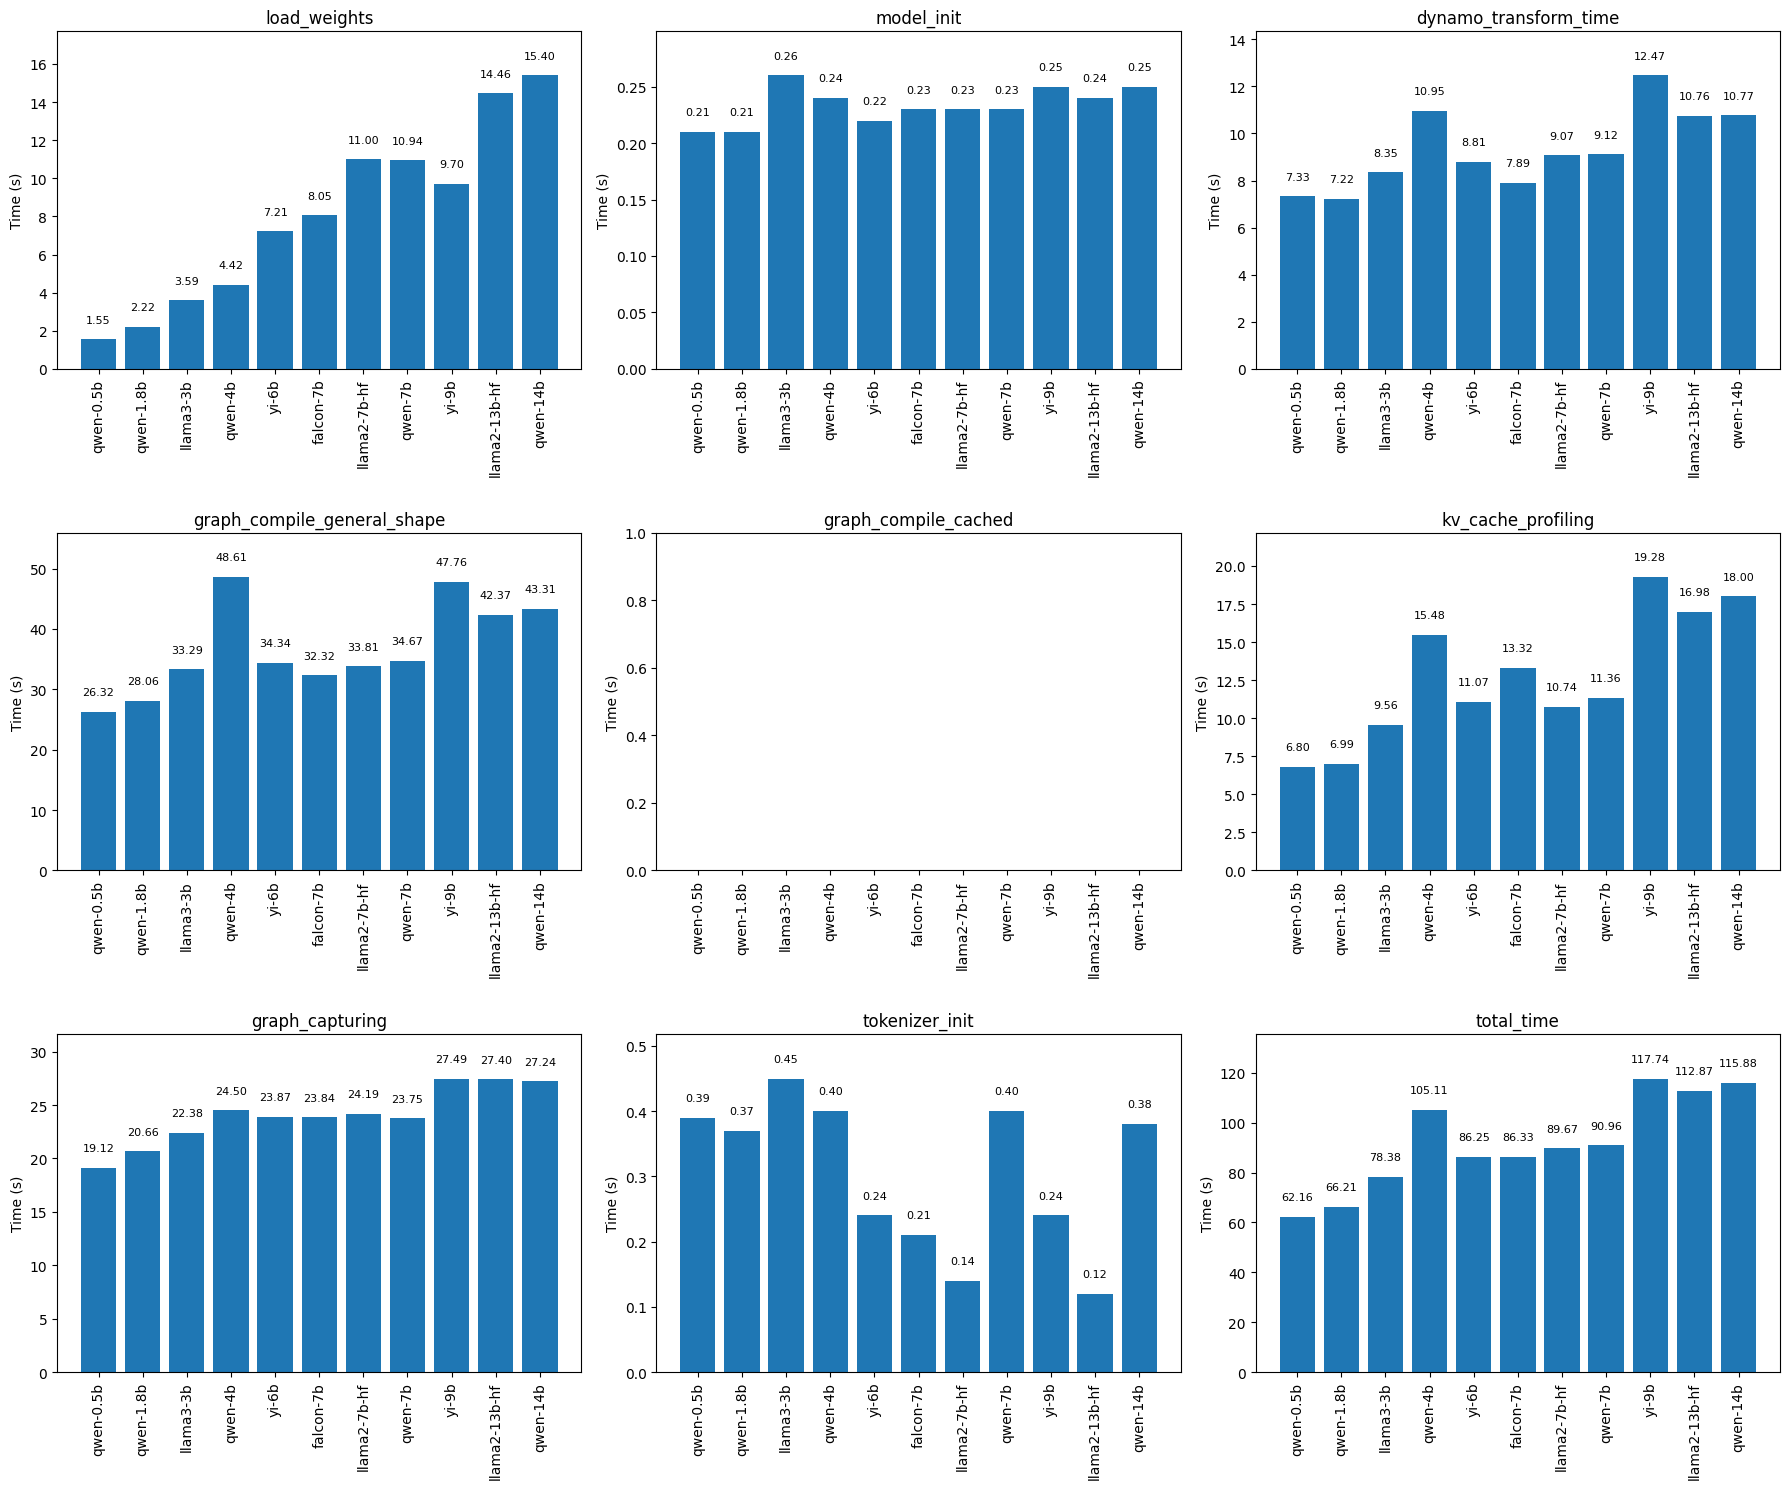

In [9]:
model_size_not_cached_json_filepath = "examples/model_size_old/not_cached/comparison_results.json"
draw_graph(model_size_not_cached_json_filepath, "model_size")

### Graph Compilation Cached

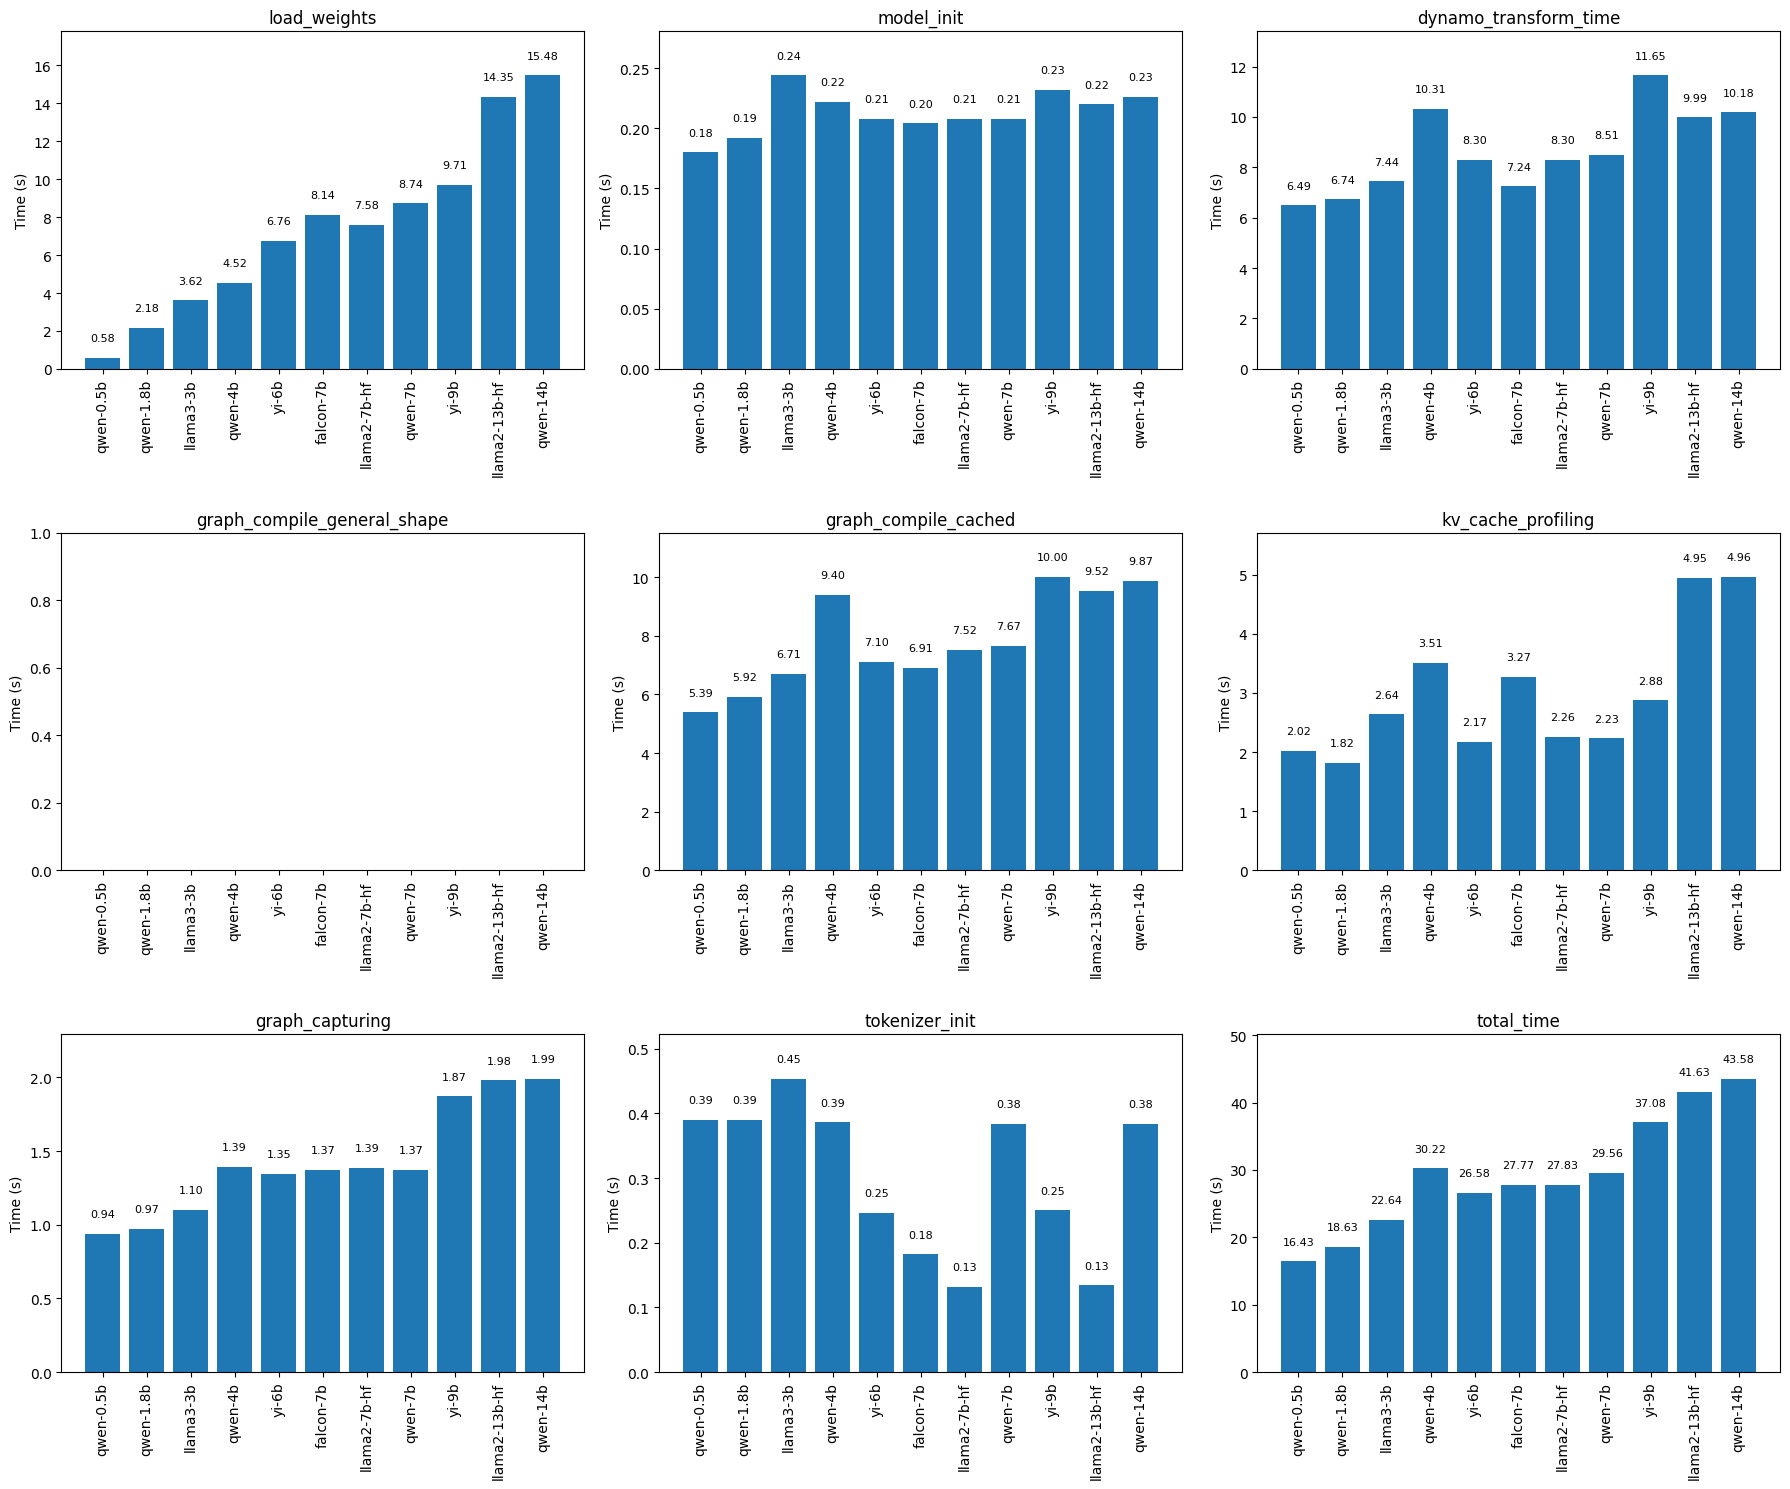

In [3]:
model_size_json_filepath = "examples/model_size/avg_comparison_results.json"
draw_graph(model_size_json_filepath, "model_size")

#### Relation between load_weights, graph_capturing and model size

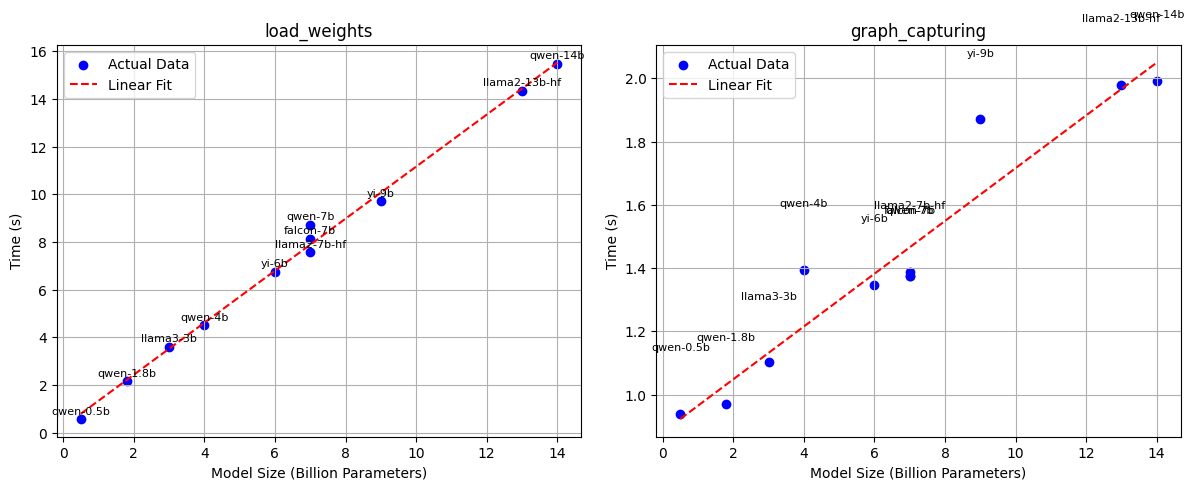

In [26]:
keys = ["load_weights", "graph_capturing"]
draw_relationship(model_size_json_filepath, "model_size", keys, "Model Size (Billion Parameters)", extract_model_size)

#### Relation between graph_compile_cached, dynamo_transform_time and nb_layers

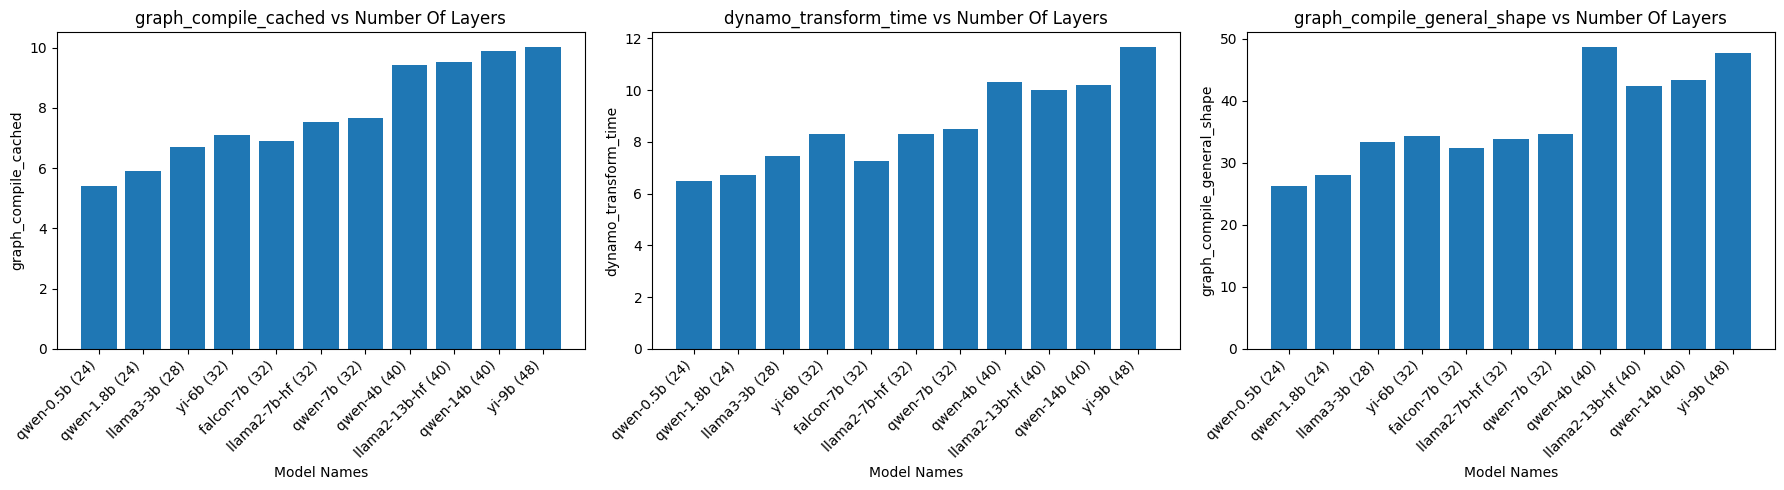

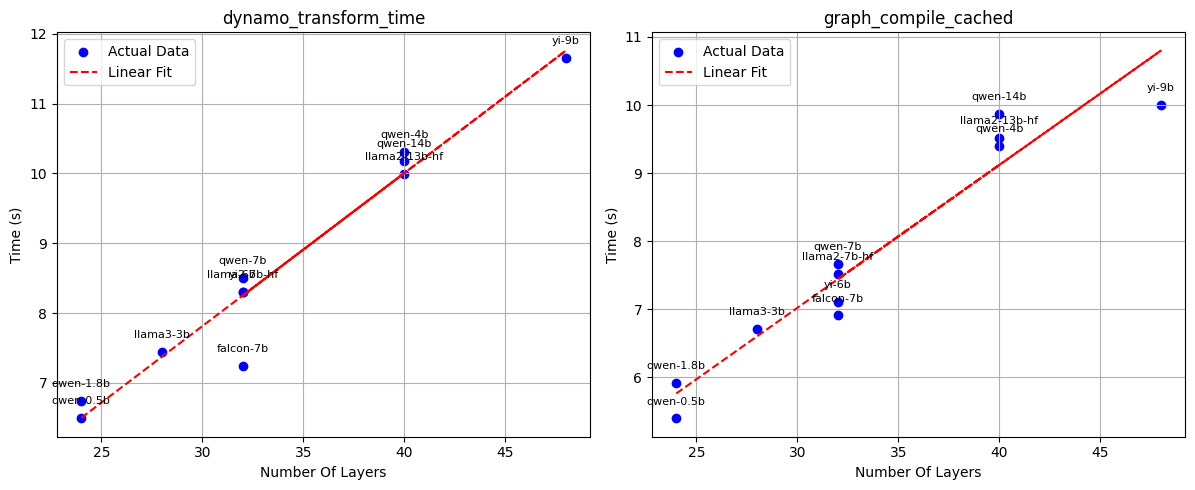

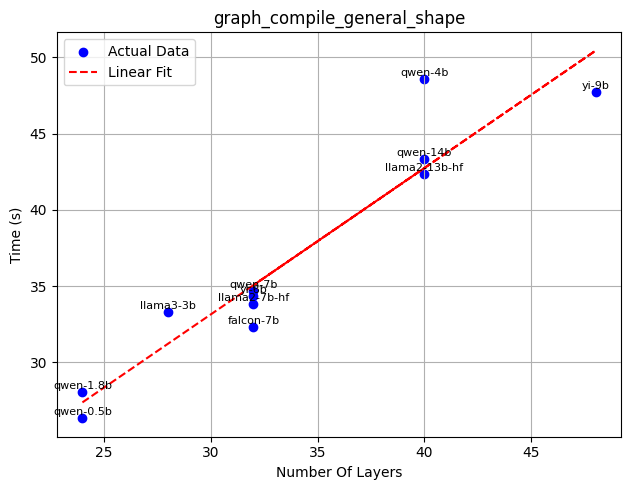

In [16]:
draw_metric_wrt_metric([
    {"json_filepath": model_size_json_filepath, "metric": "graph_compile_cached"},
    {"json_filepath": model_size_json_filepath, "metric": "dynamo_transform_time"},
    {"json_filepath": model_size_not_cached_json_filepath, "metric": "graph_compile_general_shape"}
], {"key": "layers", "title": "Number Of Layers"})

keys = ["dynamo_transform_time", "graph_compile_cached"]
draw_relationship(model_size_json_filepath, "model_size", keys, "Number Of Layers", extract_nb_layers)

# keys = ["graph_compile_cached"]
# draw_relationship(model_size_json_filepath, "model_size", keys, "Number Of Layers * Graph Size", extract_nb_layers_x_graph_size)

keys = ["graph_compile_general_shape"]
draw_relationship(model_size_not_cached_json_filepath, "model_size", keys, "Number Of Layers", extract_nb_layers)

#### Relation between kv_cache_profiling and ??

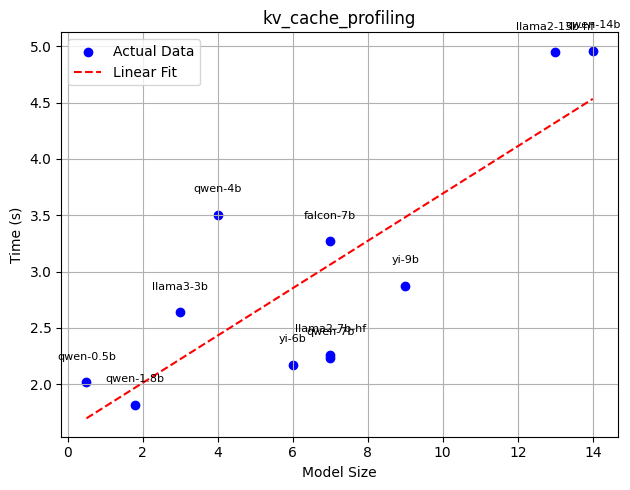

In [25]:
keys = ["kv_cache_profiling"]
draw_relationship(model_size_json_filepath, "model_size", keys, "Model Size", extract_model_size)

#### Relation between tokenizer_init_time and vocab_size

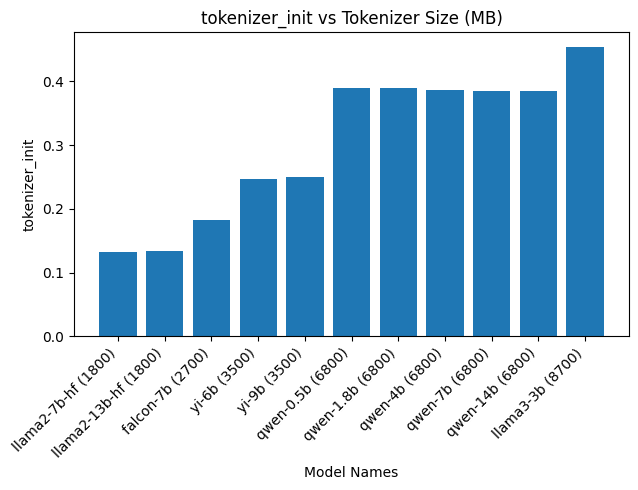

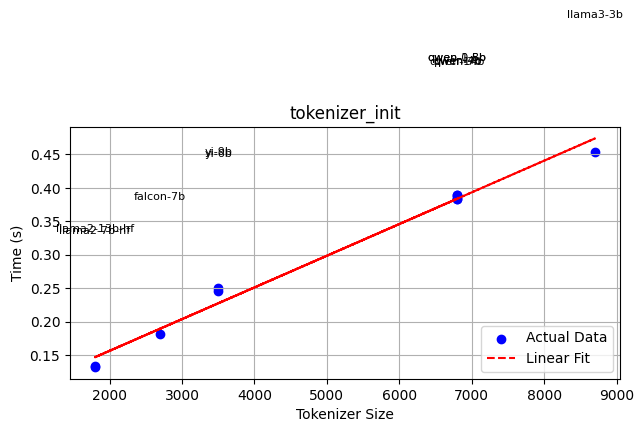

In [23]:
draw_metric_wrt_metric([{"json_filepath": model_size_json_filepath, "metric": "tokenizer_init"}], {"key": "tokenizer_size", "title": "Tokenizer Size (MB)"})
draw_relationship(model_size_json_filepath, "model_size", ["tokenizer_init"], "Tokenizer Size", extract_tokenizer_size)

## Batch Size

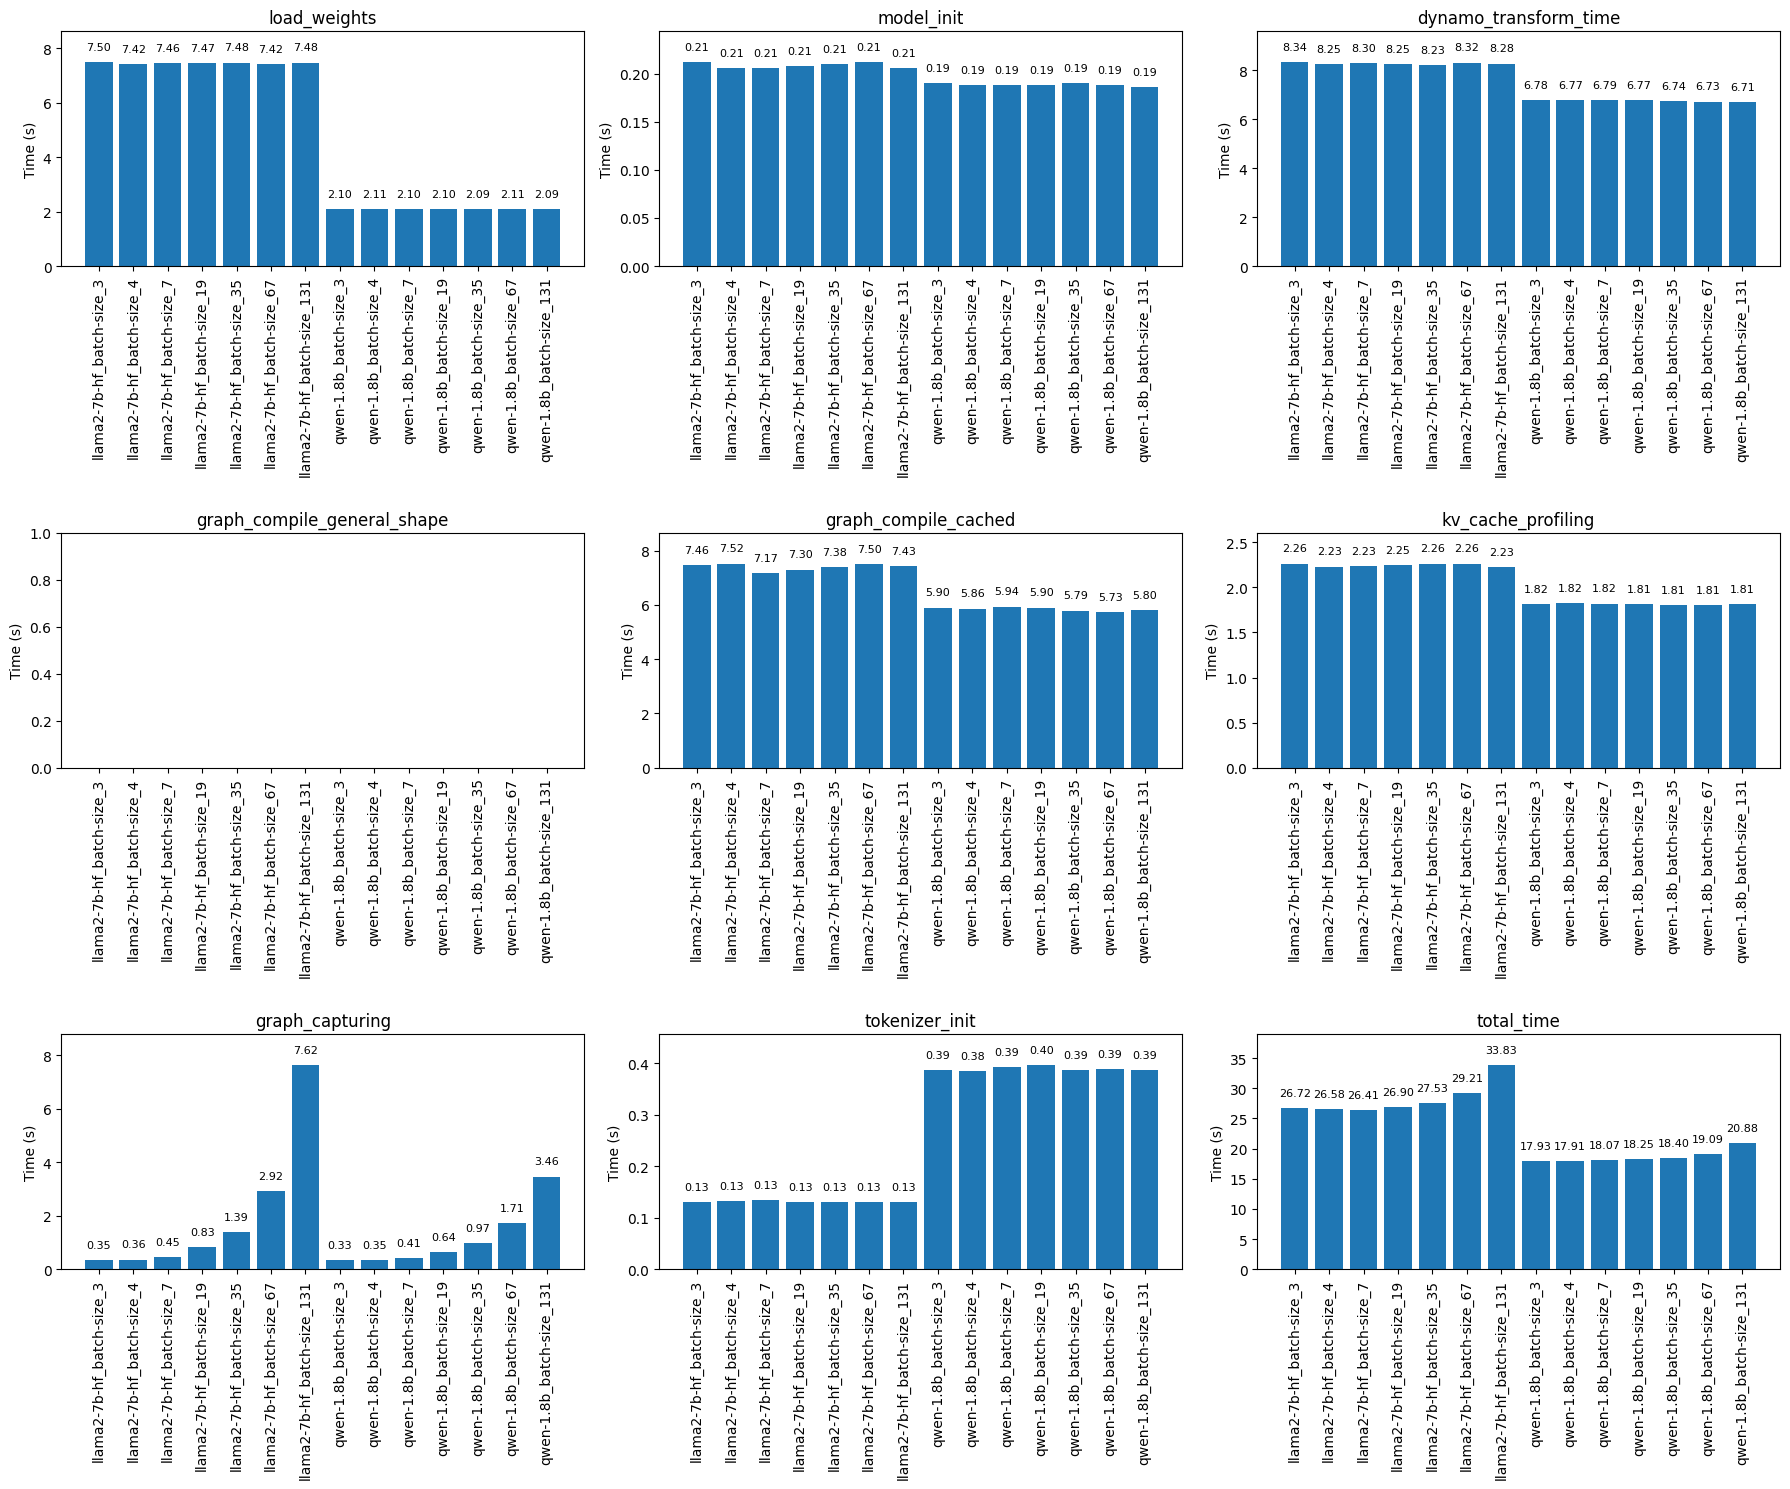

In [19]:
batch_size_json_filepath = "examples/batch_size/avg_comparison_results.json"
draw_graph(batch_size_json_filepath, "alphabetical")

#### Relation between graph_capturing and batch_size

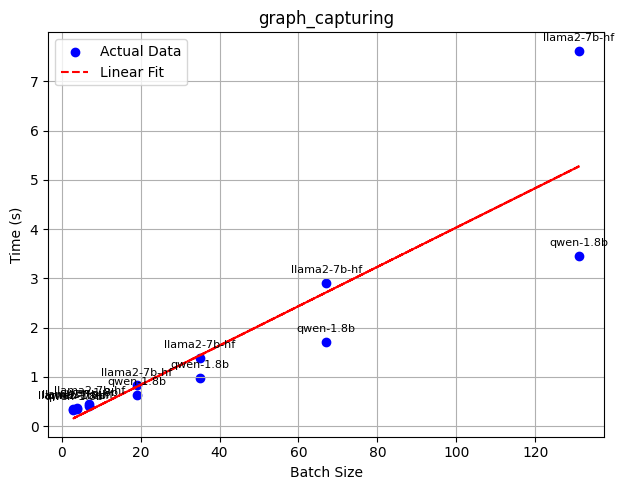

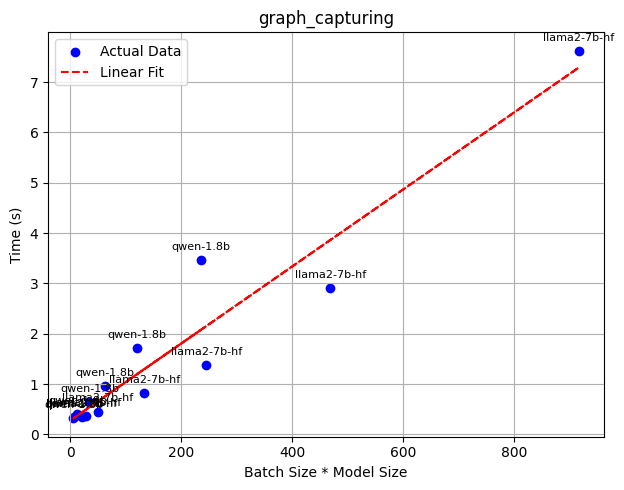

In [22]:
draw_relationship(batch_size_json_filepath, "alphabetical", ["graph_capturing"], "Batch Size", extract_batch_size)
draw_relationship(batch_size_json_filepath, "alphabetical", ["graph_capturing"], "Batch Size * Model Size", extract_batch_size_x_model_size)

#### Relation between graph_capturing and batch_size * model_size

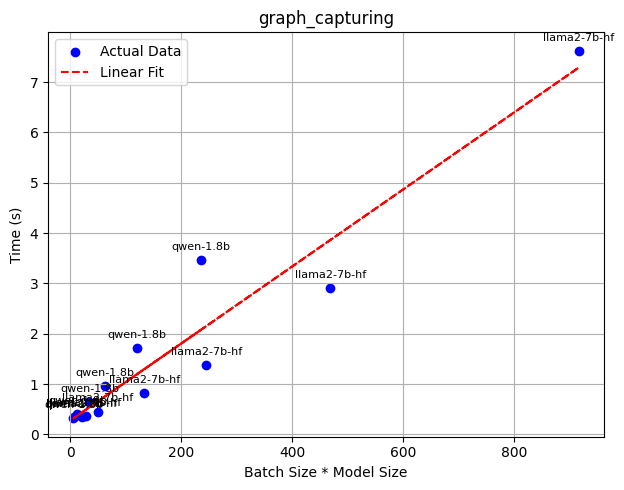

In [67]:
draw_relationship(batch_size_json_filepath, "alphabetical", ["graph_capturing"], "Batch Size * Model Size", extract_batch_size_x_model_size)

## GPU Util

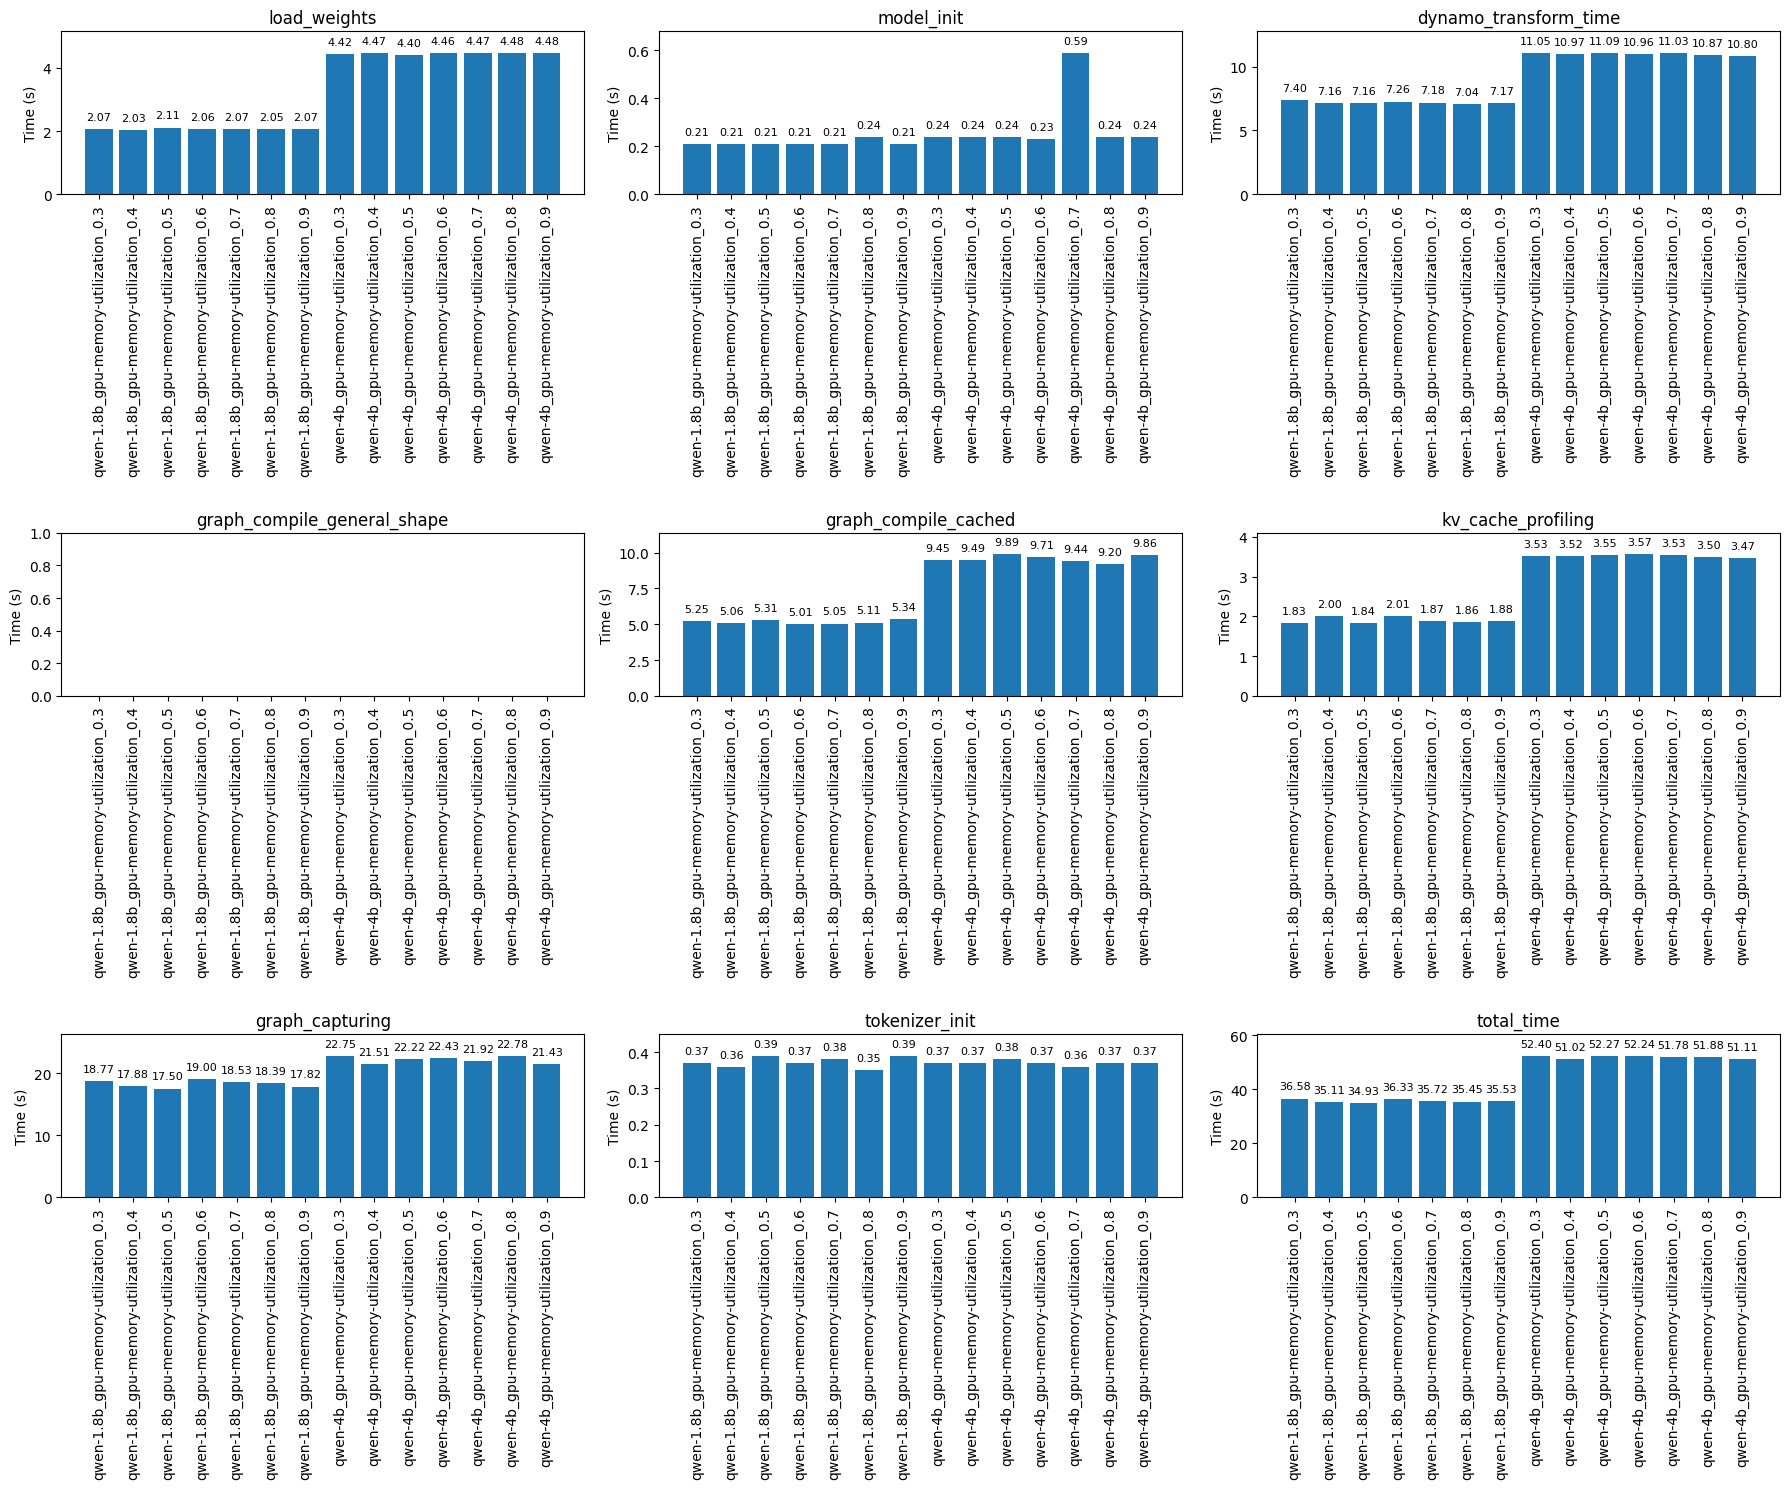

In [ ]:
gpu_util_json_filepath = "examples/gpu_util/comparison_results.json"
draw_graph(gpu_util_json_filepath, "alphabetical")

### Analysis

As expected, it has no influence on the latency

## Max Sequence Length To Capture

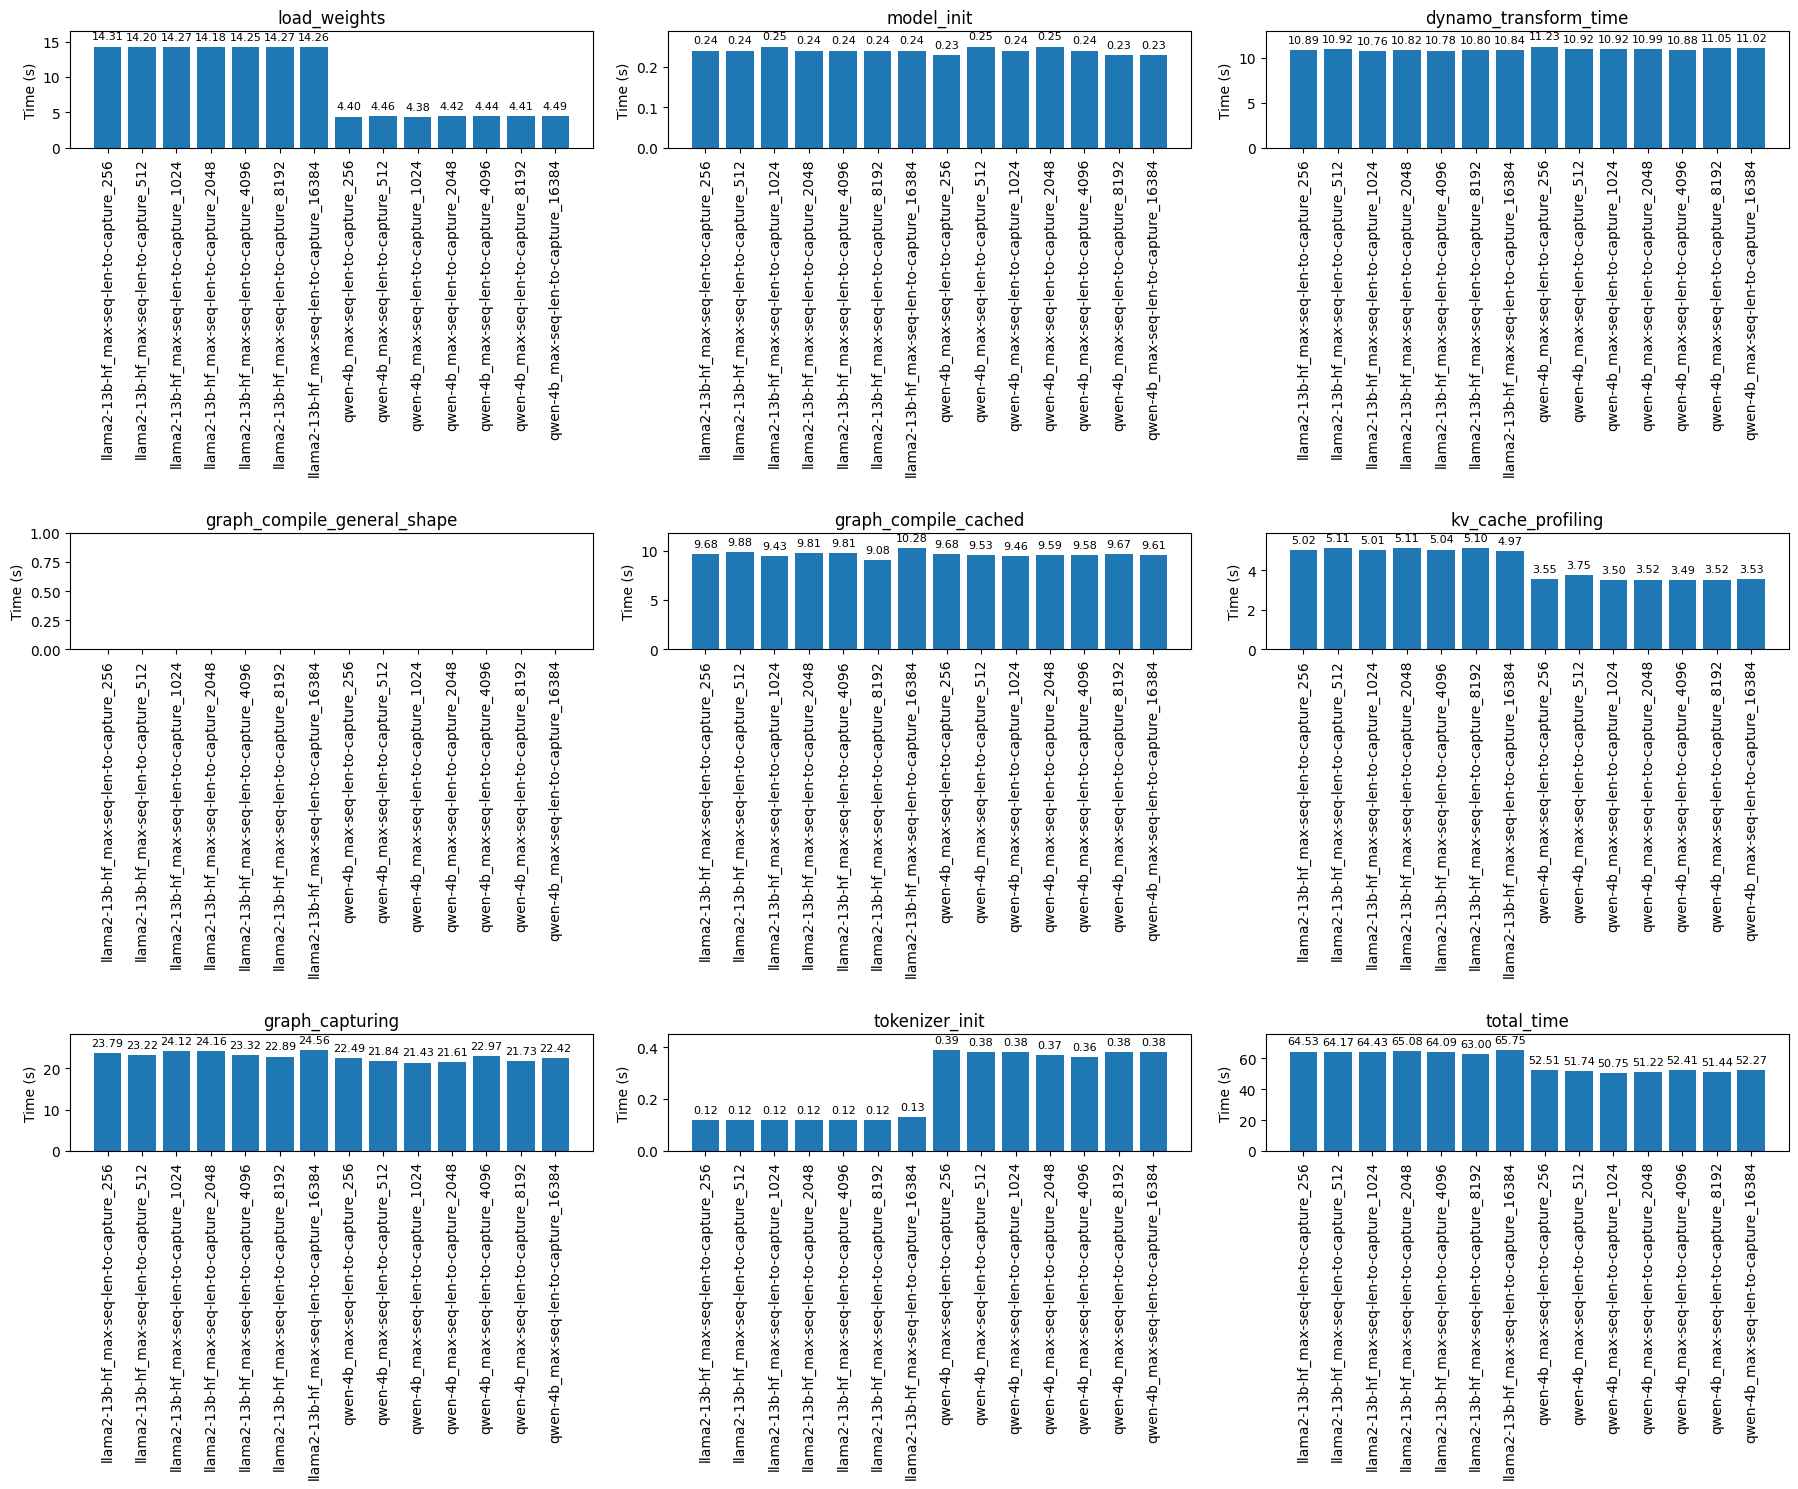

In [ ]:
max_seq_len_json_filepath = "examples/max_seq_len_to_capture/comparison_results.json"
draw_graph(max_seq_len_json_filepath, "alphabetical")

### Analysis

This flag seems to not affect anything at all
Not sure why, my understanding that it should increase capture time or at least memory usage. But nothing changes!

## Max Model Len

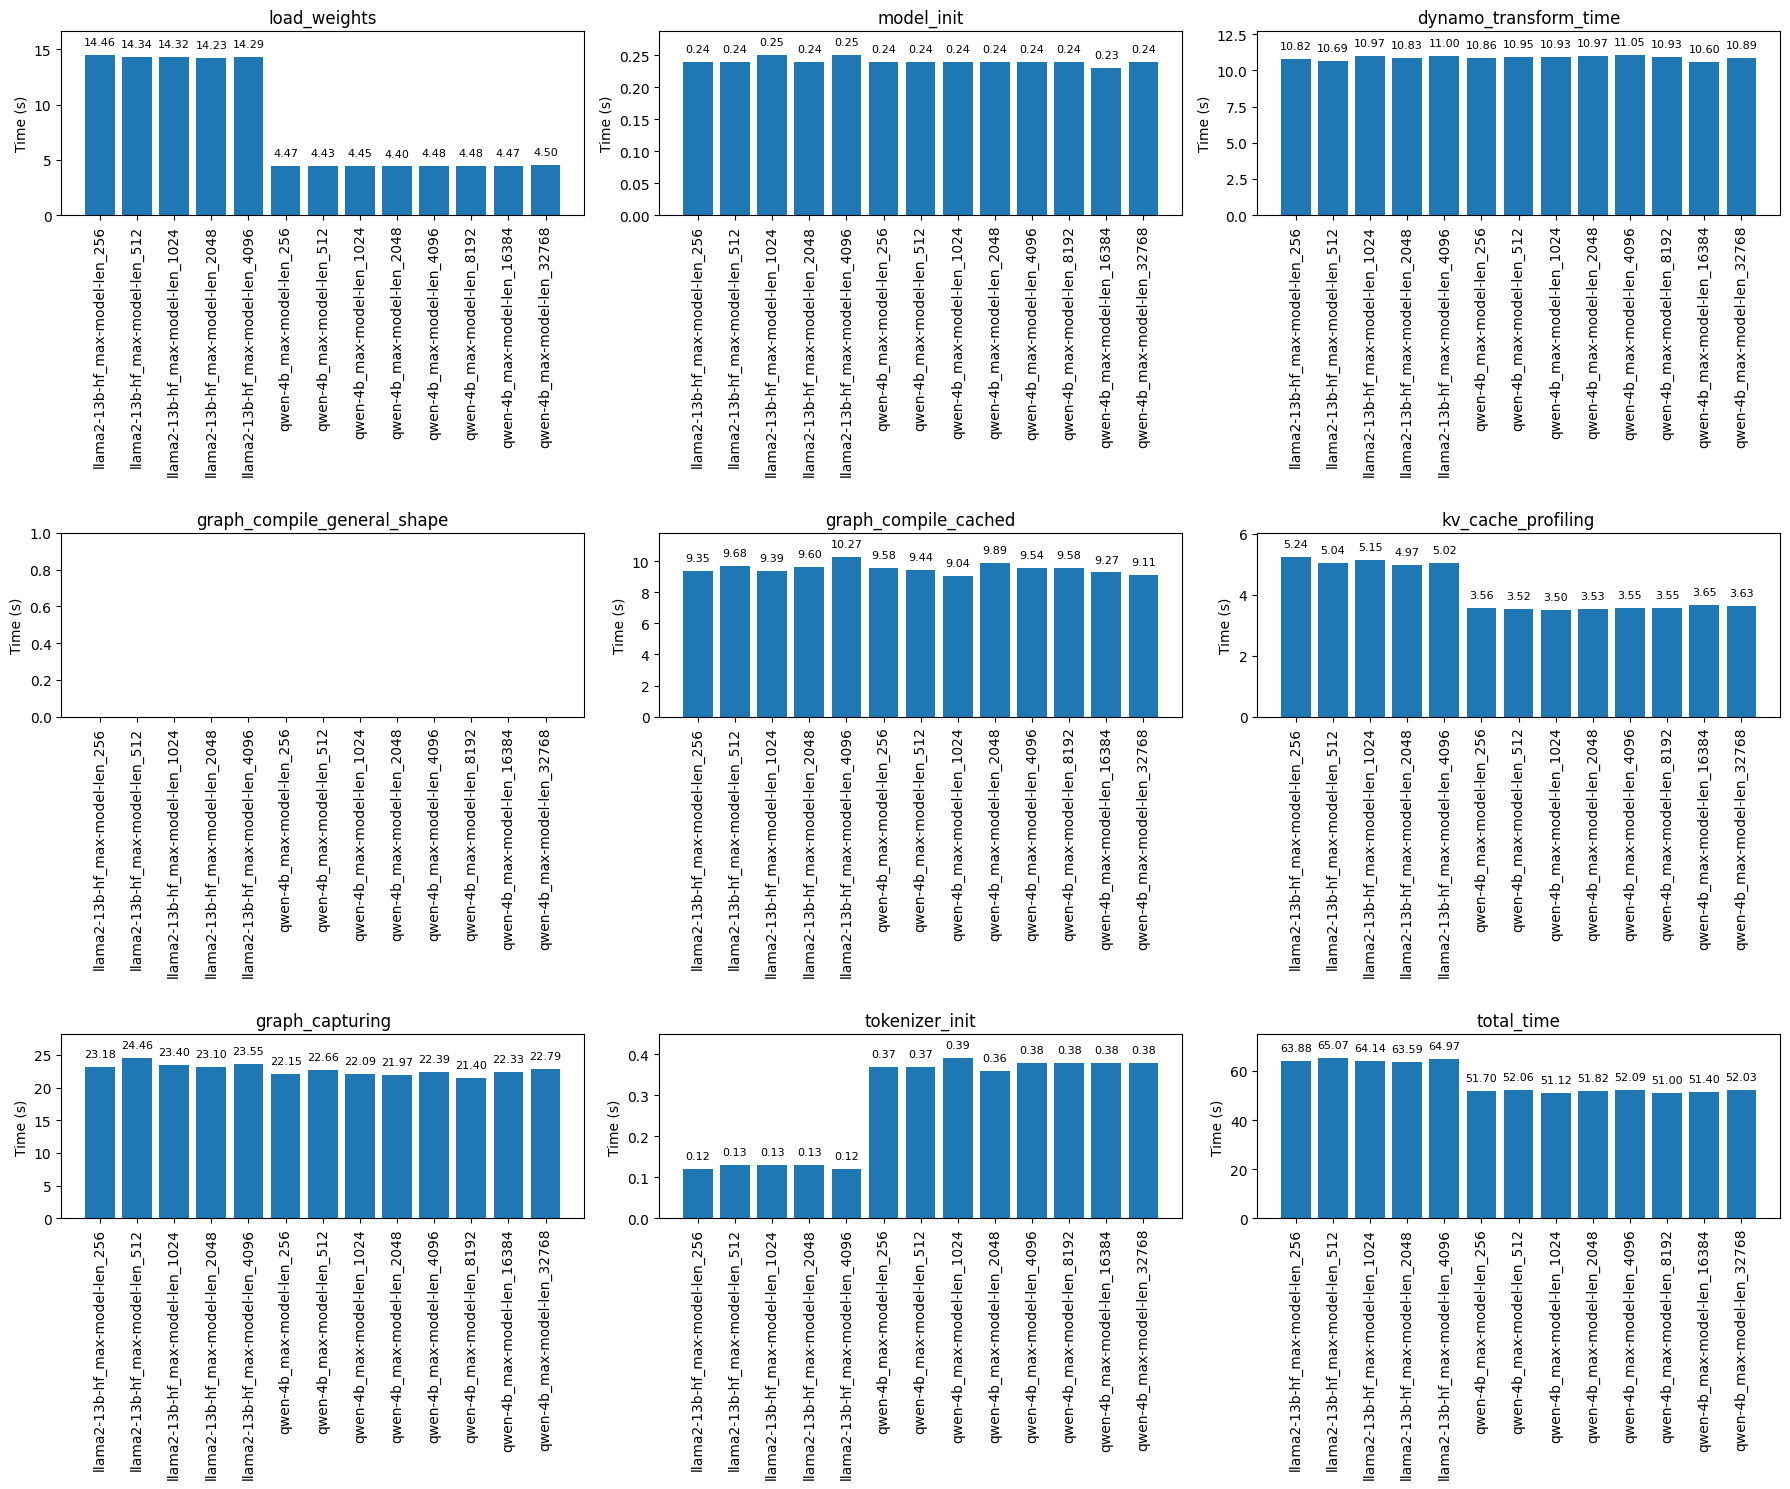

In [ ]:
max_model_len_json_filepath = "examples/max_model_len/comparison_results.json"
draw_graph(max_model_len_json_filepath, "alphabetical")

### Analysis

First of all, changing this requires new compilation (cannot reuse cache)

## Max Num Sequences

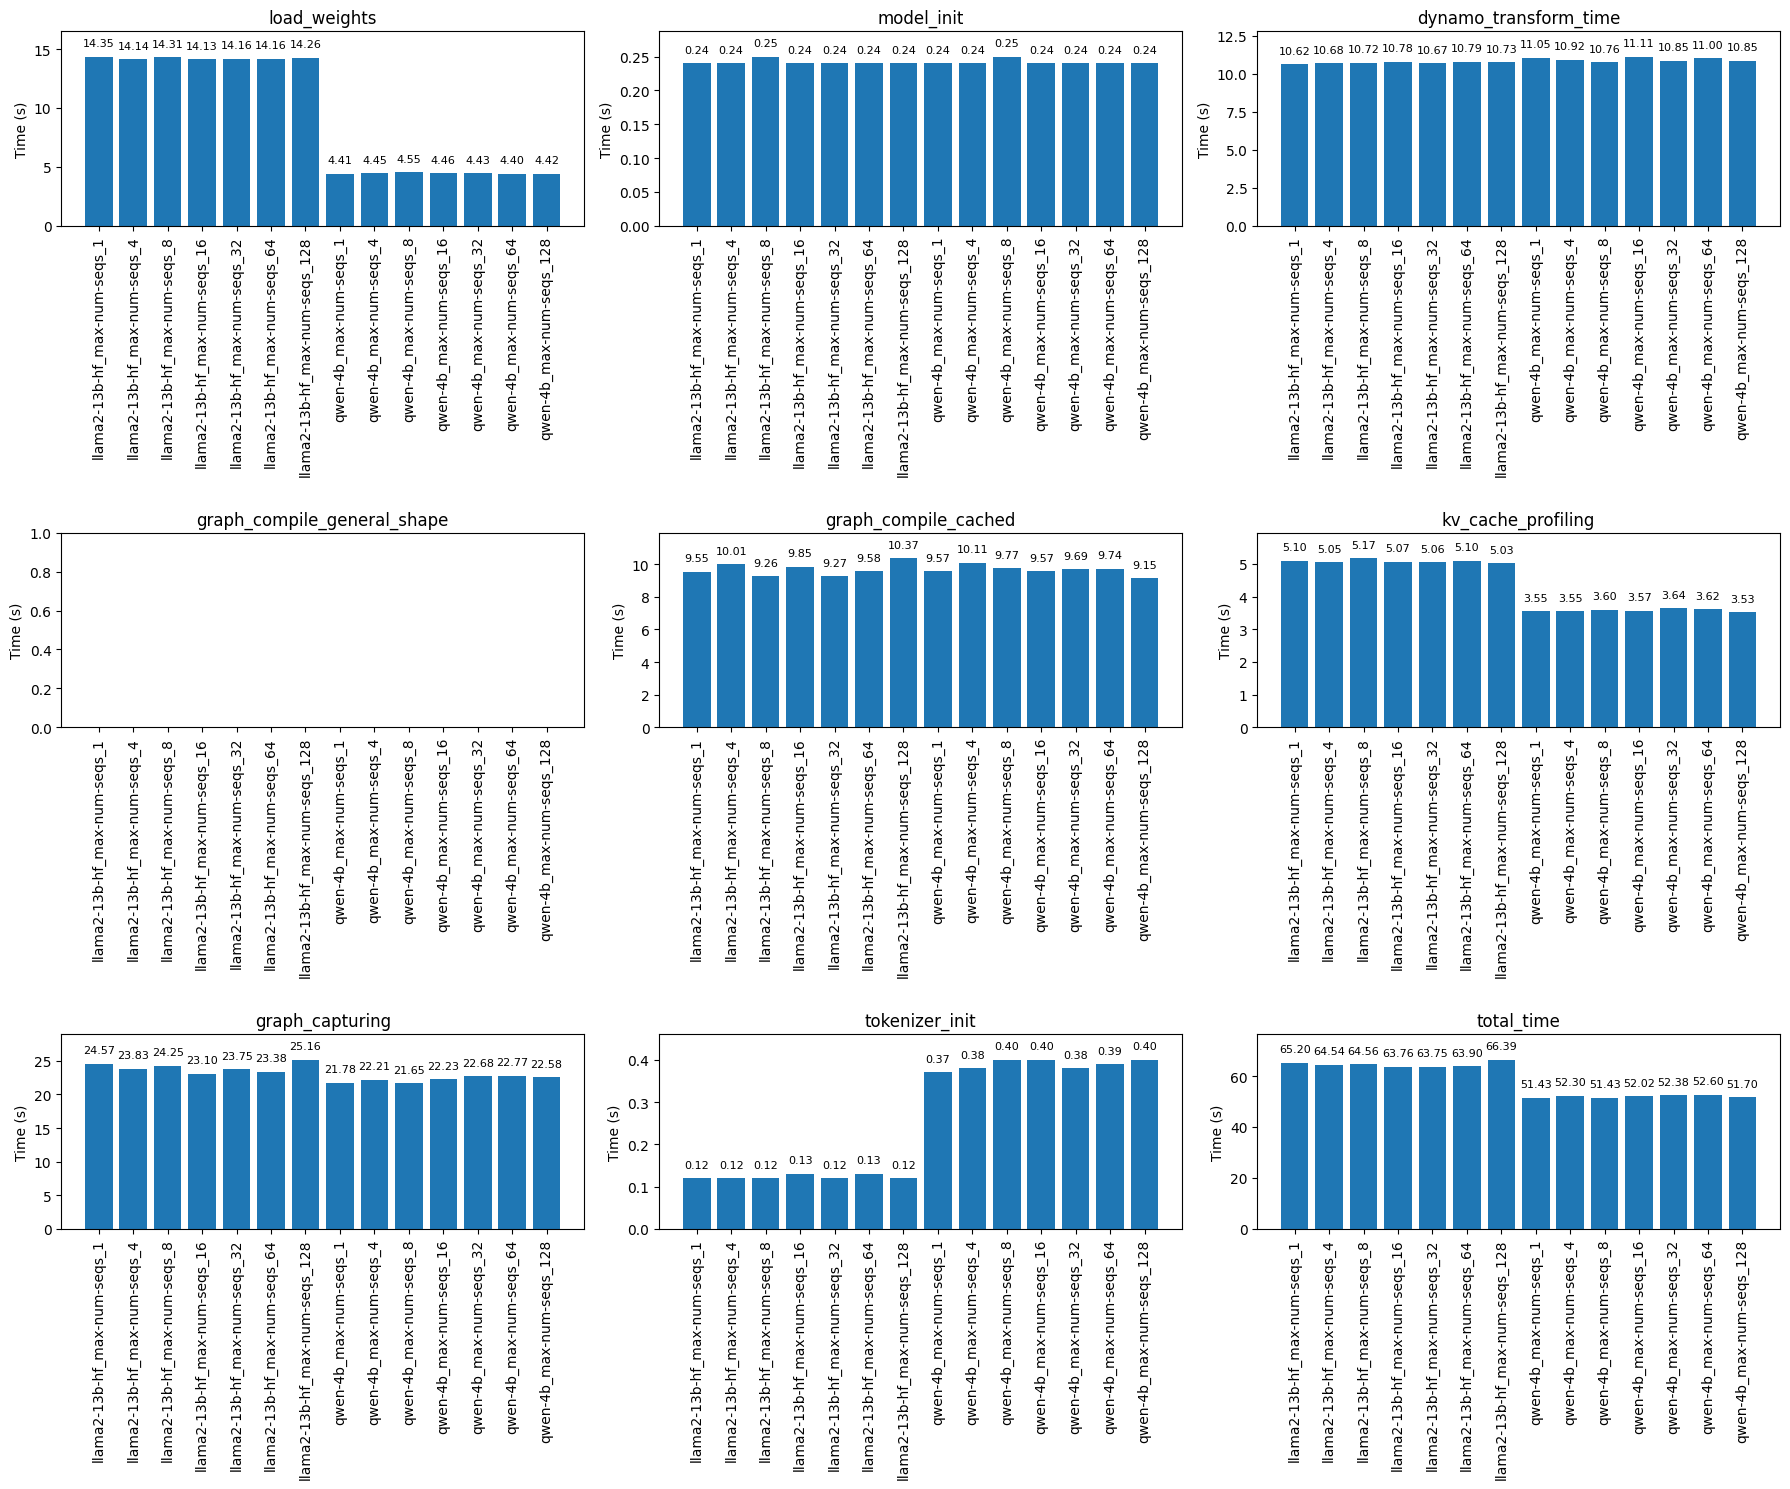

In [ ]:
max_num_seqs_json_filepath = "examples/max_num_seqs/comparison_results.json"
draw_graph(max_num_seqs_json_filepath, "alphabetical")